# Loan_Prediction

### Goal:
* To try and implement various Classification and Regression models.
* Automate Pre processing and model running(Pipeline), for future.
* To Extract maximum information and predictions from our data by:
    * Using various columns as our dependent variables.
    * Passing data with predictions to other models and using it to predict other features.
    * Trying both, classification and regression on problems statements, that allow.

### Approach:
* Notebook is written in a systematic way for easy understanding.
* We have defined and used functions where ever possible, to try and automate tasks.
* We have included model pipelines, to automate model running and evaluation.
* The domain expert will have feature importances ready, incase they need to do feature selection.
* In order to conserve cost, processing power and time, we have commented some code, which we intent to optimize in the future with better processing power.

## Index:
1. [Problem Statement](#1 "Dataset+Column Description, Problem statements").
2. [Library Imports](#2 "Libraries Imported and used in this project").
3. [Functions Used](#3 "Functions Created and used in this project").
4. [Loading Datasets](#4 "Reading Training and Testing Datasets and storing in our DataFrames").  
<br>  
5. [EDA](#5 "Exploratory Data Analysis").
    * [Basic EDA](#5.1 "Running Basic Statistical Summaries").
    * [Visualizations](#5.2 "The most important Visualization").   
<br>  
6. [Data Preprocessing](#6 "Preparing Data for the models").
    * [Duplicated values](#6.1 "Checking and handling Duplicate records").
    * [Null Values](#6.2 "Checking and imputing/handling Null records").
    * [Feature Engineering](#6.3 "Creating Total Income from Applicant+CoApplicant Incomes").
    * [Label Encoder](#6.4 "Converting Categorical columns to Discrete numeric datatype").  
<br>  
7. [Problem Statement 1](#7 "Predicting Loan Status on Test Dataset").
    * [Creating Dataframes](#7.1 "Creating new DataFrames for current Problem Statement").
    * [Defining X & Y](#7.2 "Defining Independent/Dependent/Testing Variables").
    * [Correlation matrix](#7.3 "Generating Correlation Matrix with visual").
    * [DF to Array type](#7.4 "Converting - '.values' for faster processing").
    * [Feature Importance](#7.5 "Checking for any feature with 0 importance").
    * [SMOTE](#7.6 "Handing imbalance in Independent variable class for X_train").
    * [Classification model pipeline](#7.7 "Running a pipeline for common Classification models").
        * [Metrics Summary](#7.7a "Metrics Summary for base Classification models").
    * [Tuning/Pruning](#7.8 "Model Optimization for well performing models").
        * [Logistic Regression (adjusting threshold)](#7.8a "Dedicated approach for Logistic Regression").
        * [Random Forest (GridSearchCv)](#7.8b "Hyperparameter tuning for Random Forest").
        * [SVC (GridSearchCv)](#7.8c "Hyperparameter tuning for SVC model").
    * [SMOTE for Training dataset](#7.9 "Handing imbalance in Independent variable class for X in Train Dataset").
    * [Final Predictions](#7.10 "Using best model for Predictions on Test Dataset and dumping to a .csv file").  
<br>  
8. [Problem Statement 2(a)](#8 "Predicting Loan Amount on Test Dataset for Rejected Loans").
    * [Creating Dataframes](#8.1 "Creating new DataFrames for current Problem Statement").
    * [Defining X & Y](#8.2 "Defining Independent/Dependent/Testing Variables").
    * [DF to Array type](#8.3 "Converting - '.values' for faster processing").
    * [Feature Importance](#8.4 "Checking for any feature with 0 importance")
    * [Regression model pipeline](#8.5 "Running a pipeline for common Regression models").
    * [Tuning/Pruning](#8.6 "Model Optimization for well performing models").
        * [Linear (Base/Ridge/Lasso)](#8.6a "Dedicated approach [L1+L2 penalty] for Linear Regression").
        * [Random Forest (GridSearchCv)](#8.6b "Hyperparameter tuning for Random Forest").
        * [Extra Tree (GridSearchCv)](#8.6c "Hyperparameter tuning for Extra Tree").
    * [Metrics Summary](#8.7 "Metrics Summary of Tuned/Pruned Regression models, performing well").
    * [Final Predictions](#8.8 "Using best model for Predictions on Test Dataset and dumping to a .csv file").  
<br>      
9. [Problem Statement 2(b)](#9 "Predicting Loan Amount Term on Test Dataset for Rejected Loans").
    * [Creating Dataframes](#9.1  "Creating new DataFrames for current Problem Statement").
    * [Defining X & Y](#9.2 "Defining Independent/Dependent/Testing Variables").
    * [Feature Importance](#9.3 "Checking for any feature with 0 importance")
    * [Regression model pipeline](#9.4 "Running a pipeline for common Regression models").
    * [UpSampling](#9.5 "Resampling Dependent variable classes with less than 100 samples to 100").
    * [Re-Running model pipeline](#9.6 "Runing the model pipeline again with balanced Data").
    * [Tuning/Pruning](#9.7 "Model Optimization for well performing models").
        * [Random Forest (GridSearchCv)](#9.7a "Hyperparameter tuning for Random Forest").
        * [Extra Tree (GridSearchCv)](#9.7b "Hyperparameter tuning for Extra Tree").
    * [Metrics Summary](#9.8 "Metrics Summary of Tuned/Pruned Regression models, performing well").
    * [Final Prediction](#9.9 "Using best model for Predictions on Test Dataset and dumping to a .csv file").
    * [Extra Step](#9.10 "Trying to solve the same problem using Classification, instead of Regression").

<a id='1'></a>
### About Dataset
The data contains client loan data and whether there loan got approved or not.
The main goal is to find out loan approval prediction over testing data using model (created using training data)

### Problem Statement: 

A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History and others. The requirements are as follows:

1. Check eligibility of the Customer given the inputs described above.(Classification)
2. If customer is not eligible for the input required amount and duration:
    * What can be amount for the given duration.(Regression)
    * If duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)
    
### Content:

<body>
    <h3>Dataset columns and definition</h3>
	<table>
		<thead>
			<tr>
                <th><u>Feature</u></th>
                <th><u>Description</u></th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td>Loan_ID</td>
				<td>Unique id for every loan request.</td>
			</tr>
			<tr>
				<td>Gender</td>
				<td>Applicant's Gender.</td>
			</tr>
			<tr>
				<td>Married</td>
				<td>Applicant's Marital status.</td>
			</tr>
			<tr>
				<td>Dependents</td>
				<td>How many people are dependent on the Applicant in his/her family.</td>
			</tr>
			<tr>
				<td>Education</td>
				<td>Applicant's Education.</td>
			</tr>
			<tr>
				<td>Self_Employed</td>
				<td>Whether the applicant is employed | Owner of business.</td>
			</tr>
			<tr>
				<td>ApplicantIncome</td>
				<td>Applicant's Income on record.</td>
			</tr>
			<tr>
				<td>CoapplicantIncome</td>
				<td>CoApplicant's Income on record.</td>
			</tr>
			<tr>
				<td>LoanAmount</td>
				<td>Amount of Loan required.</td>
			</tr>
			<tr>
				<td>Loan_Amount_Term</td>
				<td>Duration in which applicant wants to pay back the loan amount.</td>
			</tr>
			<tr>
				<td>Credit_History</td>
				<td>Whether the candidate has good or bad credit history in past.</td>
			</tr>
			<tr>
				<td>Property_Area</td>
				<td>Type of locality of property which the candidate has given as mortage. The type tells us about property valuation.</td>
			</tr>
        </tbody>
	</table>
</body>

<a id='2'></a>
### Library Imports.

In [1]:
# Time to run
import time
start_time = time.time()

# Basic Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# We set options to display all columns
pd.set_option('display.max_columns', None)

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & PreTraining
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Classification Models & Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Regression Models & Metrics.
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

<a id='3'></a>
### Functions used

In [2]:
# Function to Calculate time to run and display in minutes & seconds
def calculate_execution_time(start_time, end_time):
    execution_time = end_time - start_time  # Time in seconds
    minutes, seconds = divmod(execution_time, 60)  # Time in minutes & Seconds
    return f"Execution time: {int(minutes)} minutes and {seconds:.2f} seconds"

# Function for handling missing values.
def impute_missing_values(df):
    for column in df.columns:
        if df[column].dtype == 'object' or df[column].dtype == 'category':
            # For object (categorical) columns, fill missing values with the mode
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)
        else:
            # For numeric columns, fill missing values with the mean
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)
            
            
# Function to convert categorical columns to Discrete Numerical values.            
def label_encode_columns(df, columns_to_encode):
    label_encoder = LabelEncoder()
    
    for column in columns_to_encode:
        df[column] = label_encoder.fit_transform(df[column])
        label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
        
        print(f'Feature: {column}')
        print('Mapping:', label_mapping)
    return df

# Function for Classification Model Pipeline.
def build_and_evaluate_classification_pipeline(X_train, y_train, X_test, y_test, model):
    """
    Build and evaluate a scikit-learn pipeline for classification.

    Parameters:
    - X_train: Features of the training data.
    - y_train: Target variable of the training data.
    - X_test: Features of the testing data.
    - y_test: Target variable of the testing data.
    - model: The classification model to be evaluated.

    Returns:
    - accuracy: The accuracy score of the classification model on the test data.
    - report: The classification report including precision, recall, and F1-score.
    - cm: The confusion matrix of the classification model.

    The function constructs a pipeline that includes data preprocessing (scaling) and the specified classification model.
    It then fits the pipeline to the training data, makes predictions on the test data, and calculates accuracy, classification
    report, and confusion matrix.
    """
    # Create the full Classification pipeline
    preprocessor = Pipeline([
        ('scaler', StandardScaler())
    ])

    # Create the full pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Standardize features
        ('model', model)  # Use the selected Classification model
    ])

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate the classification report
    report = classification_report(y_test, y_pred)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, report, cm

# Function for Regression Model Pipeline.
def build_and_evaluate_regression_pipeline(X_train, y_train, X_test, y_test, model):
    """
    Build and evaluate a regression pipeline on the given training and testing data.

    Parameters:
    - X_train: Features of the training data.
    - y_train: Target variable of the training data.
    - X_test: Features of the testing data.
    - y_test: Target variable of the testing data.
    - model: The regression model to be evaluated.

    Returns:
    - metrics: A dictionary containing model evaluation metrics (R-squared, adjusted R-squared, RMSE).
    """
    # Create the full regression pipeline
    regression_pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('model', model)  # Use the selected regression model
    ])

    # Fit the pipeline to the training data
    regression_pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = regression_pipeline.predict(X_test)
    
    # Calculate model accuracy
    model_accuracy = regression_pipeline.score(X_train, Y_train)

    # Calculate metrics: R-squared, adjusted R-squared, and RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_pred)

    # Calculate adjusted R-squared
    n = len(X_test)
    p = X_test.shape[1]
    adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

    return model_accuracy, r_squared, adjusted_r_squared, rmse

#Function for Upscaling multiclass.
def balance_multiclass_dataset_with_limit(df, target_column, desired_samples_per_class, random_state=10):
    """
    Balance a multi-class dataset using upsampling with a limit on the number of samples per class.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the dataset.
        target_column (str): The name of the target column (class labels).
        desired_samples_per_class (int): The maximum number of samples per class after upsampling.
        random_state (int): Random seed for reproducibility.

    Returns:
        pd.DataFrame: A balanced DataFrame with up to 'desired_samples_per_class' samples from each minority class.
    """
    # Get unique class labels
    class_labels = df[target_column].unique()

    # Create an empty DataFrame to store the upsampled data
    balanced_df = pd.DataFrame()

    # Upsample each class to match the desired number of samples
    for label in class_labels:
        class_data = df[df[target_column] == label]
        
        # Check if upsampling is needed
        if len(class_data) < desired_samples_per_class:
            upsampled_class_data = resample(class_data, 
                                           replace=True,  # Sample with replacement
                                           n_samples=desired_samples_per_class, 
                                           random_state=random_state)
        else:
            upsampled_class_data = class_data
        
        # Concatenate the upsampled class data with the majority class data
        balanced_df = pd.concat([balanced_df, upsampled_class_data])

    # Shuffle the balanced dataset to mix the samples
    balanced_df = balanced_df.sample(frac=1, random_state=random_state)

    return balanced_df

<a id='4'></a>
### Loading Datasets.

In [3]:
df_train = pd.read_csv(r'training_set.csv', header=0)
df_test = pd.read_csv(r'testing_set.csv', header=0)

df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


<a id='5'></a>
### EDA

<a id='5.1'></a>
#### Basic Data Exploration.

#### Training Data

In [5]:
# Checking Shape and Datatypes

print("The shape of the data:", df_train.shape)
print("\n Data types: \n", df_train.dtypes)

The shape of the data: (614, 13)

 Data types: 
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
property_Area         object
Loan_Status           object
dtype: object


In [6]:
# Checking Statistical Summary

print("Data description:")
df_train.describe(include="all")

Data description:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
count,614,599,611,599,613,582,612.000000,613.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,487,398,345,479,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5405.540850,1620.888940,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6118.914057,2928.624748,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2875.750000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3806.000000,1167.000000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5803.750000,2302.000000,168.000000,360.00000,1.000000,NaN,NaN


In [7]:
# Checking non-null values and datatype of each feature and the total memory used by the dataframe

print("Data Information: \n\n")
df_train.info();

Data Information: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [8]:
# Checking column names

df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status'],
      dtype='object')

Checking for singularity and high-cardinality.

In [9]:
columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term', 
           'Credit_History', 'property_Area', 'Loan_Status']

for col in columns:
    print(col, ":\n", df_train[col].value_counts(), ":\n")

Gender :
 Male      487
Female    112
Name: Gender, dtype: int64 :

Married :
 Yes    398
No     213
Name: Married, dtype: int64 :

Dependents :
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 :

Education :
 Graduate        479
Not Graduate    134
Name: Education, dtype: int64 :

Self_Employed :
 No     500
Yes     82
Name: Self_Employed, dtype: int64 :

Loan_Amount_Term :
 360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64 :

Credit_History :
 1.0    475
0.0     89
Name: Credit_History, dtype: int64 :

property_Area :
 Semiurban    233
Urban        202
Rural        179
Name: property_Area, dtype: int64 :

Loan_Status :
 Y    422
N    192
Name: Loan_Status, dtype: int64 :



#### Testing Data

In [10]:
# Checking Shape and Datatypes

print("The shape of the data:", df_test.shape)
print("\n Data types: \n", df_test.dtypes)

The shape of the data: (367, 12)

 Data types: 
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
property_Area         object
dtype: object


In [11]:
# Checking Statistical Summary

print("Data description:")
df_test.describe(include="all")

Data description:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area
count,367,356,367,357,367,344,367.000000,367.000000,362.000000,361.000000,338.000000,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,LP001015,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban
freq,1,286,233,200,283,307,NaN,NaN,NaN,NaN,NaN,140
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN


In [12]:
# Checking non-null values and datatype of each feature and the total memory used by the dataframe

print("Data Information: \n\n")
df_test.info();

Data Information: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [13]:
# Checking column names

df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'property_Area'],
      dtype='object')

<a id='5.2'></a>
### Visualizations

Text(0.5, 1.0, 'Count-Plot for Loan_Status')

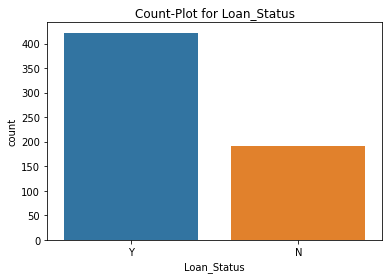

In [21]:
# Count-Plot for Target Variable:

plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df_train)
plt.title('Count-Plot for Loan_Status')

A higher number of loan applications (422) were approved (Y) compared to the instances where the applications were rejected (N), which amounted to 192.

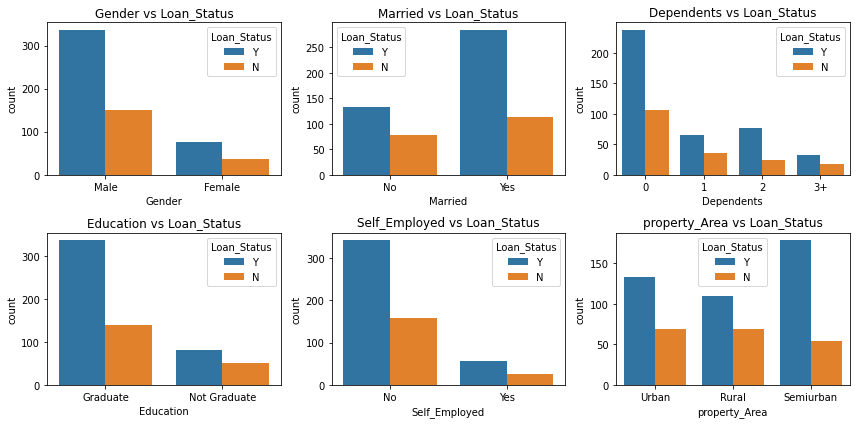

In [14]:
# Count-Plot for Categorical X vs Y Variable

countplot_list = ["Gender","Married","Dependents","Education","Self_Employed","property_Area"]
plt.figure(figsize=(12,6))
x=1
for i in countplot_list:
    plt.subplot(2,3,x)
    sns.countplot(x=i,hue='Loan_Status',data=df_train)
    plt.title(f'{i} vs Loan_Status')
    x = x + 1
plt.tight_layout()

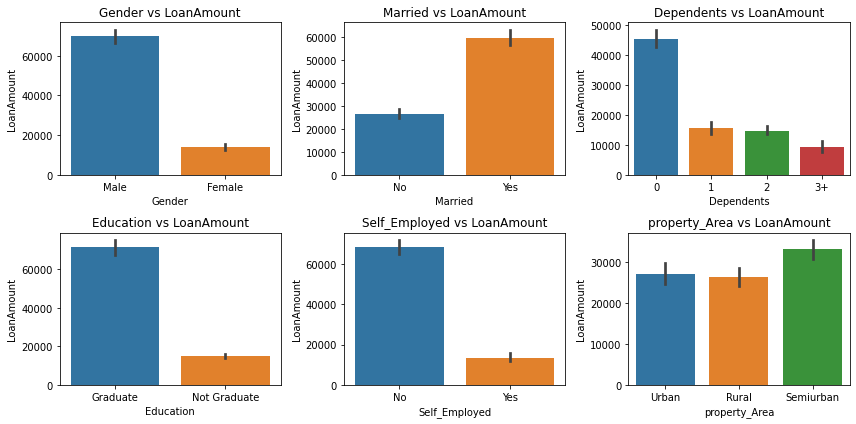

In [15]:
# Bar-charts for Categorical X vs Y Variable

barplot_list = ["Gender","Married","Dependents","Education","Self_Employed","property_Area"]
plt.figure(figsize=(12,6))
for i, category in enumerate(barplot_list, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=category, y='LoanAmount', data=df_train, estimator=np.sum)
    plt.title(f'{category} vs LoanAmount')

plt.tight_layout()
plt.show()

From above EDA, we got to learn that, high amount of loan was applied and high count of loan approval for customers:-

* who are male
* Who are married
* who has no dependents.
* who are graduated
* who are not self employed

Text(0.5, 1.0, 'Boxplot for Dependents vs LoanAmount')

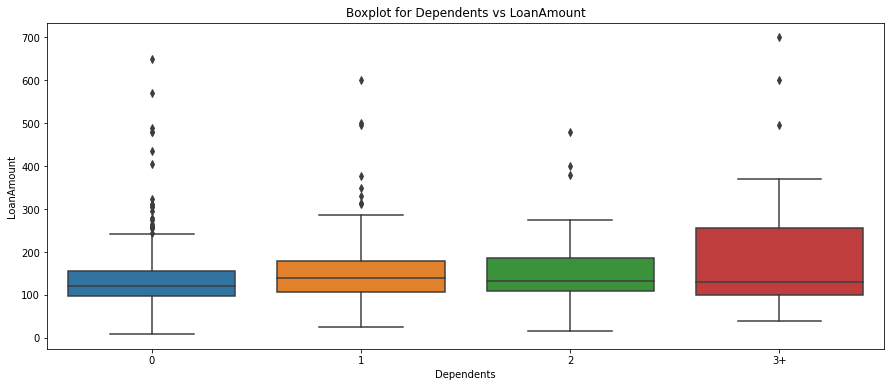

In [16]:
# Boxplot for Numerical Variable vs Categorical Variable:

plt.figure(figsize=(15, 6))
sns.boxplot(x='Dependents', y='LoanAmount', data=df_train)
plt.title('Boxplot for Dependents vs LoanAmount')

Applicants with 3 or more dependents have a wider range of loan amounts (represented by a larger IQR).  
This implies that, on average, individuals with more dependents tend to request a broader range of loan amounts compared to those with fewer dependents.

Text(0.5, 1.0, 'Distribution of LoanAmount')

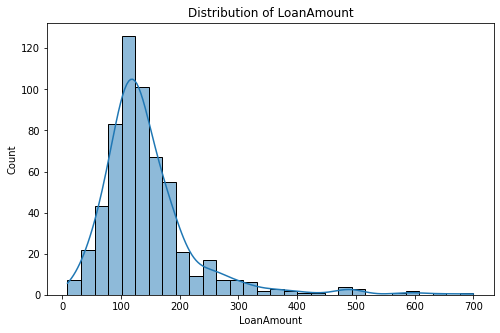

In [17]:
# Distribution Plot for Numerical Variable:

plt.figure(figsize=(8, 5))
sns.histplot(df_train['LoanAmount'], bins=30, kde=True)
plt.title('Distribution of LoanAmount')

Most applicants request loan amounts within a moderate range (0-300).  
A smaller number of applicants have requested higher loan amounts, creating the right tail.

Text(0.5, 1.0, 'Correlation Heatmap')

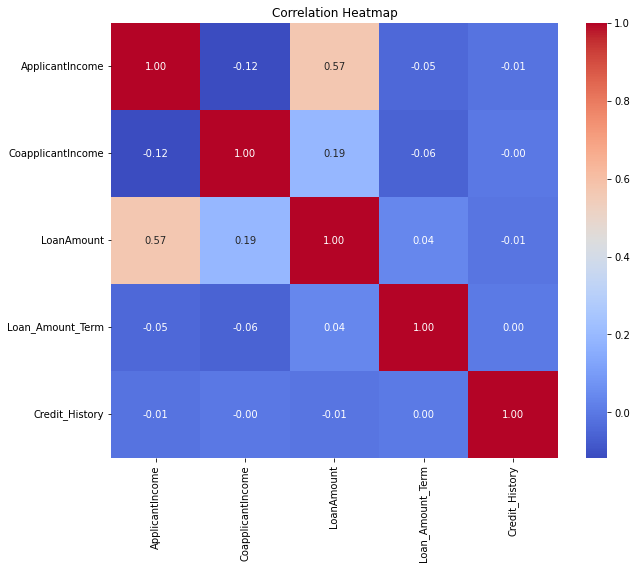

In [18]:
# Correlation Heatmap:

plt.figure(figsize=(10, 8))
correlation_matrix = df_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

**ApplicantIncome vs. LoanAmount (0.57):** There is a moderate positive connection. As ApplicantIncome goes up, the requested LoanAmount also tends to increase.

**CoapplicantIncome vs. LoanAmount (0.19):** The positive relationship is weaker compared to ApplicantIncome. Higher CoapplicantIncome is somewhat associated with higher LoanAmount.

**ApplicantIncome vs. CoapplicantIncome (-0.12):** There is a weak negative link. As ApplicantIncome increases, there's a slight tendency for CoapplicantIncome to decrease.

Text(0.5, 1.02, 'Pairplot for Numerical Variables')

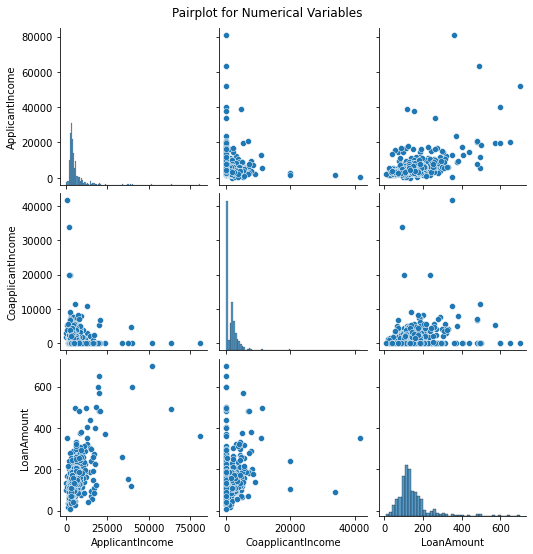

In [19]:
# Pairplot for Numerical Variables:

numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
sns.pairplot(df_train[numerical_columns])
plt.suptitle('Pairplot for Numerical Variables', y=1.02)

The high peaks on the left in the diagonal plots and the clustering in the lower values in the scatter plots suggest that a significant portion of applicants and coapplicants has lower incomes and tends to request lower loan amounts.  
The presence of extreme values in the scatter plots indicates that there are cases where applicants with lower incomes request higher loan amounts, and vice versa.

Text(0.5, 1.0, 'Violin Plot for Education vs LoanAmount')

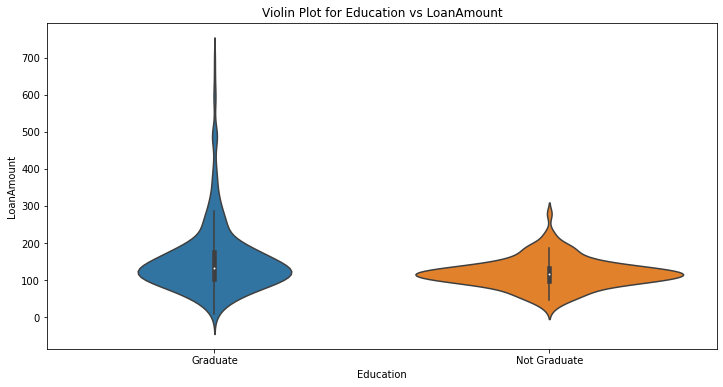

In [20]:
# Violin Plot for Categorical Variable vs Numerical Variable:

plt.figure(figsize=(12, 6))
sns.violinplot(x='Education', y='LoanAmount', data=df_train)
plt.title('Violin Plot for Education vs LoanAmount')

Graduates show less variability, but there are cases of higher loan amounts, whereas non-graduates exhibit more variability, but the highest loan amounts are generally lower.

<a id='6'></a>
### Pre-processing the data

<a id='6.1'></a>
#### Checking for duplicated values

In [16]:
print("Duplicated records in train data:", df_train.duplicated().sum())
print("Duplicated records in test data:", df_test.duplicated().sum())

Duplicated records in train data: 0
Duplicated records in test data: 0


<a id='6.2'></a>
#### Checking if there are missing values. If yes, we will handle them.

In [17]:
df_train.isnull().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
dtype: int64

In [18]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
property_Area         0
dtype: int64

In [19]:
# Fixing data types of Loan_Amount_Term & Credit_History before imputing.

df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].astype('category')
df_train['Credit_History'] = df_train['Credit_History'].astype('category')

df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].astype('category')
df_test['Credit_History'] = df_test['Credit_History'].astype('category')

print(df_train.Loan_Amount_Term.dtype, df_train.Credit_History.dtype)
print(df_test.Loan_Amount_Term.dtype, df_test.Credit_History.dtype)

category category
category category


In [20]:
# Using Function to Handle Null Values

impute_missing_values(df_train)
impute_missing_values(df_test)    

# Confirming 
print("Null values in training dataset", df_train.isnull().sum().sum())
print("Null values in testing dataset", df_test.isnull().sum().sum())

Null values in training dataset 0
Null values in testing dataset 0


<a id='6.3'></a>
#### Feature Engineering

In [21]:
# Adding Applicant income and coapplicant income to make total income.

df_train["TotalIncome"] = df_train["ApplicantIncome"] + df_train["CoapplicantIncome"]
df_test["TotalIncome"] = df_test["ApplicantIncome"] + df_test["CoapplicantIncome"]

# Dropping Applicant income and coapplicant income

df_train = df_train.drop(["ApplicantIncome","CoapplicantIncome"],axis=1)
df_test = df_test.drop(["ApplicantIncome","CoapplicantIncome"],axis=1)

In [22]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.00000
1,LP001003,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,6913.54085
2,LP001005,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.00000
3,LP001006,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.00000
4,LP001008,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.00000


In [23]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,TotalIncome
0,LP001015,Male,Yes,0,Graduate,No,110.0,360.0,1.0,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,126.0,360.0,1.0,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,208.0,360.0,1.0,Urban,6800
3,LP001035,Male,Yes,2,Graduate,No,100.0,360.0,1.0,Urban,4886
4,LP001051,Male,No,0,Not Graduate,No,78.0,360.0,1.0,Urban,3276


<a id='6.4'></a>
#### Converting categorical variables to discrete numeric variables

In [24]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'property_Area', 'Loan_Status', 'TotalIncome'],
      dtype='object')

In [25]:
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'property_Area', 'TotalIncome'],
      dtype='object')

In [26]:
columns_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'property_Area']

# Using function to label encode categorical columns
df_train = label_encode_columns(df_train, columns_to_encode)

Feature: Gender
Mapping: {'Female': 0, 'Male': 1}
Feature: Married
Mapping: {'No': 0, 'Yes': 1}
Feature: Dependents
Mapping: {'0': 0, '1': 1, '2': 2, '3+': 3}
Feature: Education
Mapping: {'Graduate': 0, 'Not Graduate': 1}
Feature: Self_Employed
Mapping: {'No': 0, 'Yes': 1}
Feature: property_Area
Mapping: {'Rural': 0, 'Semiurban': 1, 'Urban': 2}


In [27]:
# Using function to label encode categorical columns
df_test = label_encode_columns(df_test, columns_to_encode)

Feature: Gender
Mapping: {'Female': 0, 'Male': 1}
Feature: Married
Mapping: {'No': 0, 'Yes': 1}
Feature: Dependents
Mapping: {'0': 0, '1': 1, '2': 2, '3+': 3}
Feature: Education
Mapping: {'Graduate': 0, 'Not Graduate': 1}
Feature: Self_Employed
Mapping: {'No': 0, 'Yes': 1}
Feature: property_Area
Mapping: {'Rural': 0, 'Semiurban': 1, 'Urban': 2}


In [28]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status,TotalIncome
0,LP001002,1,0,0,0,0,146.412162,360.0,1.0,2,Y,5849.00000
1,LP001003,1,1,1,0,0,128.000000,360.0,1.0,0,N,6913.54085
2,LP001005,1,1,0,0,1,66.000000,360.0,1.0,2,Y,3000.00000
3,LP001006,1,1,0,1,0,120.000000,360.0,1.0,2,Y,4941.00000
4,LP001008,1,0,0,0,0,141.000000,360.0,1.0,2,Y,6000.00000


In [29]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,TotalIncome
0,LP001015,1,1,0,0,0,110.0,360.0,1.0,2,5720
1,LP001022,1,1,1,0,0,126.0,360.0,1.0,2,4576
2,LP001031,1,1,2,0,0,208.0,360.0,1.0,2,6800
3,LP001035,1,1,2,0,0,100.0,360.0,1.0,2,4886
4,LP001051,1,0,0,1,0,78.0,360.0,1.0,2,3276


We have our final training and testing data sets with no duplicates, no missing values and correct data types.  
We will begin working on the problem statments.

<a id='7'></a>
## 1. Check eligibility of the Customer given the inputs described above.(Classification)

<a id='7.1'></a>
#### Creating new dataframes

In [30]:
train_df_1 = df_train
test_df_1 = df_test

<a id='7.2'></a>
#### Defining X & Y

In [31]:
Y = train_df_1["Loan_Status"]
X = train_df_1.drop(["Loan_Status","Loan_ID"],axis=1)

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (614, 10)
Shape of Y: (614,)


In [32]:
#P has been defined using testing data

P = test_df_1.drop(["Loan_ID"],axis=1)
print("Shape of testing dataset:", P.shape)

Shape of testing dataset: (367, 10)


<a id='7.3'></a>
#### Generating correlation matrix

In [33]:
corr_df=X.corr(method="pearson")
corr_df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,property_Area,TotalIncome
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.107930,-0.025752,0.093319
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.147141,0.004257,0.083275
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.163106,-0.000244,0.125493
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.166998,-0.065243,-0.161508
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.115260,-0.030860,0.112898
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,1.000000,-0.044776,0.620068
property_Area,-0.025752,0.004257,-0.000244,-0.065243,-0.030860,-0.044776,1.000000,-0.004419
TotalIncome,0.093319,0.083275,0.125493,-0.161508,0.112898,0.620068,-0.004419,1.000000


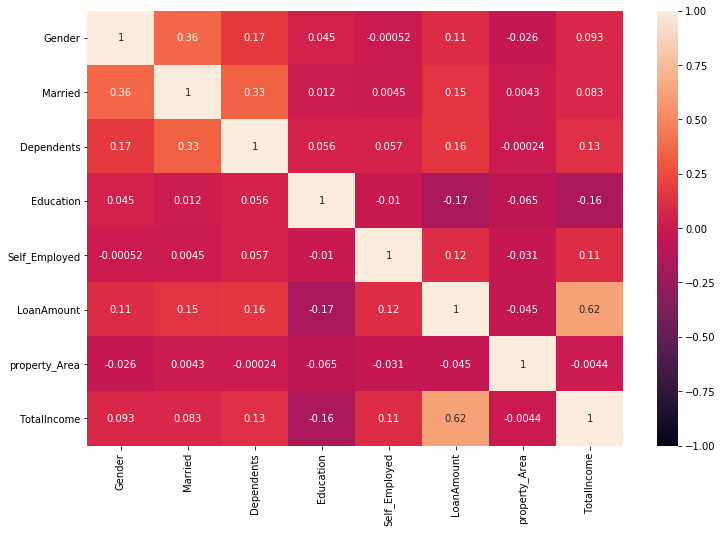

In [34]:
# Plotting correlation matrix.

plt.figure(figsize=(12,8))
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

<a id='7.4'></a>
#### Converting DataFrame to Array for faster processing

In [35]:
X = X.values
Y = Y.values

# We confirm the shape of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (614, 10)
Shape of Y: (614,)


<a id='7.5'></a>
#### Building a Random Forest Classifier model to check feature importance

In [1]:
# Splitting the data into test and train data sets.

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2,random_state=10)

# Creating a model object.

model_DecisionTree = RandomForestClassifier(n_estimators=100, random_state=10)

# Fitting the data into our model and predicting the values.

model_DecisionTree.fit(X_train,Y_train)
Y_pred = model_DecisionTree.predict(X_test)

# Building a DataFrame to view the feature importance and sort for a better visual.

feature_imp = pd.DataFrame()
feature_imp["Feature"] = df_train.drop(["Loan_Status","Loan_ID"],axis=1).columns
feature_imp["Importance"] = model_DecisionTree.feature_importances_ 
feature_imp.sort_values("Importance", ascending = False).style.hide_index()

NameError: name 'train_test_split' is not defined

<a id='7.6'></a>
**Handling unbalanced data using SMOTE**

In [37]:
# Splitting the data into test and train data sets.

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2,random_state=10)

print("Before OverSampling, counts of label '1': ", (sum(Y_train == 'Y')))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 'N')))
  
# import SMOTE from imblearn library

sm = SMOTE(random_state = 10,k_neighbors=5)
X_train, Y_train = sm.fit_resample(X_train, Y_train)
  
print('After OverSampling, the shape of train_X: ', (X_train.shape))
print('After OverSampling, the shape of train_y: ', (Y_train.shape))
  
print("After OverSampling, counts of label '1': ", (sum(Y_train == 'Y')))
print("After OverSampling, counts of label '0': ", (sum(Y_train == 'N')))

Before OverSampling, counts of label '1':  335
Before OverSampling, counts of label '0':  156
After OverSampling, the shape of train_X:  (670, 10)
After OverSampling, the shape of train_y:  (670,)
After OverSampling, counts of label '1':  335
After OverSampling, counts of label '0':  335


<a id='7.7'></a>
### Creating a model pipeline

In [38]:
# Defining multiple classification models

models = [
    LogisticRegression(),
    DecisionTreeClassifier(criterion="gini", random_state=10),
    RandomForestClassifier(n_estimators=100, random_state=10),
    SVC(kernel='linear'),
    KNeighborsClassifier(n_neighbors=3)   
]

In [39]:
### Running the model pipeline

### Looping through each model in our pipeline:
for model in models:
    accuracy, report, cm = build_and_evaluate_classification_pipeline(X_train, Y_train, X_test, Y_test, model)

    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(cm)
    print("\n")### Running the model pipeline

Model: LogisticRegression
Accuracy: 0.8048780487804879
Classification Report:
              precision    recall  f1-score   support

           N       0.83      0.42      0.56        36
           Y       0.80      0.97      0.88        87

    accuracy                           0.80       123
   macro avg       0.82      0.69      0.72       123
weighted avg       0.81      0.80      0.78       123

Confusion Matrix:
[[15 21]
 [ 3 84]]


Model: DecisionTreeClassifier
Accuracy: 0.6747967479674797
Classification Report:
              precision    recall  f1-score   support

           N       0.45      0.50      0.47        36
           Y       0.78      0.75      0.76        87

    accuracy                           0.67       123
   macro avg       0.62      0.62      0.62       123
weighted avg       0.69      0.67      0.68       123

Confusion Matrix:
[[18 18]
 [22 65]]


Model: RandomForestClassifier
Accuracy: 0.7642276422764228
Classification Report:
              precision   

<a id='7.7a'></a>
<body>
    <h1>Metrics Summary</h1>
	<table>
		<thead>
			<tr>
                <th><u>Metrics</u></th>
                <th><u>Classes</u></th>
				<th>LogisticRegression</th>
				<th>DecisionTreeClassifier</th>
				<th>RandomForestClassifier</th>
				<th>SVC</th>
				<th>KNeighborsClassifier</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td>Accuracy</td>
				<td>-</td>
				<td>80.48%</td>
				<td>67.47%</td>
				<td>76.42%</td>
				<td>79.67%</td>
				<td>68.29%</td>
			</tr>
			<tr>
				<td>Precision</td>
				<td>class 0</td>
				<td>0.83</td>
				<td>0.45</td>
				<td>0.68</td>
				<td>0.92</td>
				<td>0.46</td>
			</tr>
			<tr>
				<td>-</td>
				<td>class 1</td>
				<td>0.80</td>
				<td>0.78</td>
				<td>0.78</td>
				<td>0.78</td>
				<td>0.77</td>
			</tr>
			<tr>
				<td>Recall</td>
				<td>class 0</td>
				<td>0.42</td>
				<td>0.50</td>
				<td>0.36</td>
				<td>0.33</td>
				<td>0.44</td>
			</tr>
			<tr>
				<td>-</td>
				<td>class 1</td>
				<td>0.97</td>
				<td>0.75</td>
				<td>0.93</td>
				<td>0.99</td>
				<td>0.78</td>
			</tr>
			<tr>
				<td>F1-Score</td>
				<td>class 0</td>
				<td>0.56</td>
				<td>0.47</td>
				<td>0.47</td>
				<td>0.49</td>
				<td>0.45</td>
			</tr>
			<tr>
				<td>-</td>
				<td>class 1</td>
				<td>0.88</td>
				<td>0.76</td>
				<td>0.85</td>
				<td>0.87</td>
				<td>0.78</td>
			</tr>
		</tbody>
	</table>
</body>

* From the above report, we see that our Logistic Regression, Random Forest Classifier and SVC models, perform the best.
* We will try and tune the models to get their best scores and compare.

<a id='7.8'></a>
### Pruning/Tuning of well performing models.

<a id='7.8a'></a>
### Logistic Regression

In [40]:
# Create a model
classifier = LogisticRegression()

# fitting training data to the model
classifier.fit(X_train, Y_train)

# Predicting using .predict
y_pred_prob = classifier.predict_proba(X_test)
# print(Y_pred)

#### Adjusting the threshold

In [41]:
# printing type I and type II errors for every threshold in range (0.4-0.6)

least_error = []
type_1 = []
type_2 = []

for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 'Y', 'N')
    cfm = confusion_matrix(Y_test, predict_mine)
    total_err = cfm[0,1]+cfm[1,0]
    type_1.append(cfm[0,1])
    type_2.append(cfm[1,0])
    least_error.append(total_err)
    print("Errors at threshold ", a, ":", total_err, " , type 2 error:", cfm[1,0]," , type 1 error :", cfm[0,1])

Errors at threshold  0.4 : 25  , type 2 error: 1  , type 1 error : 24
Errors at threshold  0.41000000000000003 : 25  , type 2 error: 1  , type 1 error : 24
Errors at threshold  0.42000000000000004 : 26  , type 2 error: 2  , type 1 error : 24
Errors at threshold  0.43000000000000005 : 24  , type 2 error: 2  , type 1 error : 22
Errors at threshold  0.44000000000000006 : 24  , type 2 error: 2  , type 1 error : 22
Errors at threshold  0.45000000000000007 : 24  , type 2 error: 2  , type 1 error : 22
Errors at threshold  0.4600000000000001 : 24  , type 2 error: 2  , type 1 error : 22
Errors at threshold  0.4700000000000001 : 24  , type 2 error: 3  , type 1 error : 21
Errors at threshold  0.4800000000000001 : 25  , type 2 error: 4  , type 1 error : 21
Errors at threshold  0.4900000000000001 : 26  , type 2 error: 5  , type 1 error : 21
Errors at threshold  0.5000000000000001 : 28  , type 2 error: 9  , type 1 error : 19
Errors at threshold  0.5100000000000001 : 28  , type 2 error: 9  , type 1 e

In [42]:
# Sorting our errors in ascending order
least_error.sort()
type_2.sort()
type_1.sort()

# Displaying errors in ascending order

print("Total errors:", least_error, "\n")
print("Type 2 errors:", type_2, "\n")
print("Type 1 errors:", type_1, "\n")

# Finding least errors

print("Least total error:", min(least_error))
print("Least type 2 error:", min(type_2))
print("Least type 1 error:", min(type_1))

Total errors: [24, 24, 24, 24, 24, 25, 25, 25, 26, 26, 28, 28, 28, 29, 29, 29, 30, 30, 32, 33, 35] 

Type 2 errors: [1, 1, 2, 2, 2, 2, 2, 3, 4, 5, 9, 9, 9, 10, 11, 11, 12, 13, 17, 20, 22] 

Type 1 errors: [13, 13, 15, 17, 17, 18, 19, 19, 19, 19, 19, 21, 21, 21, 22, 22, 22, 22, 24, 24, 24] 

Least total error: 24
Least type 2 error: 1
Least type 1 error: 13


In [43]:
# Here we confirm that the threshold 0.47 gives us the least errors and best f1 scores

y_pred_class = []
for value in y_pred_prob[:,1]:
    if value > 0.47:
        y_pred_class.append('Y')
    else:
        y_pred_class.append('N')
# print(y_pred_class)

print("Confusion Matrix: \n\n", confusion_matrix(Y_test, y_pred_class)) 
print("\n Accuracy of the model: ", accuracy_score(Y_test, y_pred_class))
print("\n\n Classification Report: \n\n", classification_report(Y_test, y_pred_class))

Confusion Matrix: 

 [[15 21]
 [ 3 84]]

 Accuracy of the model:  0.8048780487804879


 Classification Report: 

               precision    recall  f1-score   support

           N       0.83      0.42      0.56        36
           Y       0.80      0.97      0.88        87

    accuracy                           0.80       123
   macro avg       0.82      0.69      0.72       123
weighted avg       0.81      0.80      0.78       123



<a id='7.8b'></a>
### Random Forest
#### Using GridSearchCV with random forest model and tuning different cv count to find best score

In [44]:
best_score = []

for i in range(4,11,1):
    rfc = RandomForestClassifier(random_state=10)

    tg = {'max_depth':range(2,10),
          'min_samples_split':range(2,5),
          'min_samples_leaf':range(2,6)}

    cv = GridSearchCV(rfc,tg,scoring="accuracy",cv=i)
    cvmodel = cv.fit(X_train, Y_train)
    best_score.append(round(cvmodel.best_score_,4))

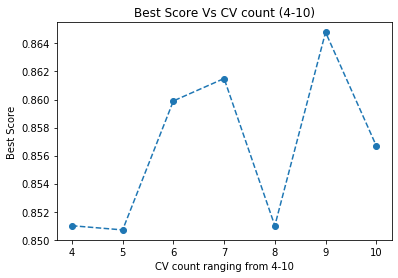

In [45]:
plt.plot(range(4,11,1),best_score,"--o")
plt.xticks(range(4,11,1))
plt.xlabel("CV count ranging from 4-10")
plt.ylabel("Best Score")
plt.title("Best Score Vs CV count (4-10)");

#### Final Grid Search CV model using cv count 9 as it is having best score comparing to other validation count size also tuning different parameter

In [46]:
rfc = RandomForestClassifier(random_state=10)

tg = {'max_depth':range(2,10),
     'min_samples_split':range(2,5),
     'min_samples_leaf':range(2,6)}

cv = GridSearchCV(rfc,tg,scoring="accuracy",cv=9)
cvmodel = cv.fit(X_train, Y_train)
round(cvmodel.best_score_,4)

0.8648

In [47]:
# Best parameters obtained from GridSearchCV model

cvmodel.best_params_

{'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 2}

#### Final Random Forest Classification model using above best parameter grid.

In [48]:
rfc = RandomForestClassifier(random_state=10,n_estimators=200, max_depth=9,min_samples_leaf=2,min_samples_split=2)
rfc_model_final = rfc.fit(X_train, Y_train)

y_pred = rfc_model_final.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)

# Generate classification report
report = classification_report(Y_test, y_pred)

# Generate confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(report)

print("Confusion Matrix:")
print(cm)

Accuracy: 0.7886178861788617
Classification Report:
              precision    recall  f1-score   support

           N       0.81      0.36      0.50        36
           Y       0.79      0.97      0.87        87

    accuracy                           0.79       123
   macro avg       0.80      0.66      0.68       123
weighted avg       0.79      0.79      0.76       123

Confusion Matrix:
[[13 23]
 [ 3 84]]


* We see that our base logistic regression model and our tuned logistic regression model perform the same.
* Random forest performs well but not better than Logistic Regression.

<a id='7.8c'></a>
### SVC

In [49]:
#  ## GridSearchCV

# best_score = []

# for i in range(4,11,1):
#     svc_1 = SVC()

#     tg = {
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'C': [0.1, 1, 10],
#     'gamma': ['scale', 'auto', 0.1, 1]
#     }

#     cv = GridSearchCV(svc_1,tg,scoring="accuracy",cv=i)
#     cvmodel = cv.fit(X_train, Y_train)
#     best_score.append(round(cvmodel.best_score_,4))


# plt.plot(range(4,11,1),best_score,"--o")
# plt.xticks(range(4,11,1))
# plt.xlabel("CV count ranging from 4-10")
# plt.ylabel("Best Score")
# plt.title("Best Score Vs CV count (4-10)");

# svc_1 = SVC()

# tg = {
# 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
# 'C': [0.1, 1, 10],
# 'gamma': ['scale', 'auto', 0.1, 1]
# }

# cv = GridSearchCV(svc_1,tg,scoring="accuracy",cv=5)
# cvmodel = cv.fit(X_train, Y_train)
# best_score.append(round(cvmodel.best_score_,4))

# # Best parameters obtained from GridSearchCV model

# cvmodel.best_params_



#  ## RandomizedSearchCV

# # Define the parameter grid with a smaller set of values
# param_dist = {
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'C': [0.1, 1, 10],
#     'gamma': ['scale', 'auto', 0.1, 1]
# }

# # Create an SVC classifier
# svc = SVC()

# # Create RandomizedSearchCV object with 100 iterations
# random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_dist, n_iter=100, cv=5)

# # Fit the RandomizedSearchCV object to your training data
# random_search.fit(X_train, Y_train)

# # Get the best hyperparameters and corresponding model
# best_params = random_search.best_params_
# best_svc = random_search.best_estimator_

# # Best parameters obtained from RandomizedSearchCV model

# best_params

# # Evaluate the model on the test set
# accuracy = best_svc.score(X_test, Y_test)

* I tried to run GridSearchCV and RandomizedSearchCV in order to find the best parameters for our SVC model. 
* I allowed 30 mins but none of them finished running and the kernel lagged.
* I decide to skip this step in order to preserve cost effectiveness and go with our new logistic regression model.
* I have commented the code in a single cell for optimization in future.

<a id='7.9'></a>
### SMOTE for final training.

In [50]:
# Handling unbalanced data using SMOTE (For X & Y for final training)

print("Before OverSampling, counts of label '1': ", (sum(Y == 'Y')))
print("Before OverSampling, counts of label '0': ", (sum(Y == 'N')))
  
# import SMOTE from imblearn library

sm = SMOTE(random_state = 10,k_neighbors=5)
X, Y = sm.fit_resample(X, Y)
  
print('After OverSampling, the shape of train_X: ', (X.shape))
print('After OverSampling, the shape of train_y: ', (Y.shape))
  
print("After OverSampling, counts of label '1': ", (sum(Y == 'Y')))
print("After OverSampling, counts of label '0': ", (sum(Y == 'N')))

Before OverSampling, counts of label '1':  422
Before OverSampling, counts of label '0':  192
After OverSampling, the shape of train_X:  (844, 10)
After OverSampling, the shape of train_y:  (844,)
After OverSampling, counts of label '1':  422
After OverSampling, counts of label '0':  422


<a id='7.10'></a>
### Final Predictions using Logistic Regression.

In [51]:
# Finalising predictions on whole training and testing datasets

# Create a model
classifier = LogisticRegression()

# fitting training data to the model
classifier.fit(X, Y)

# Predicting using .predict
y_pred_prob = classifier.predict_proba(P)

y_pred_class = []
for value in y_pred_prob[:,1]:
    if value > 0.47:
        y_pred_class.append('Y')
    else:
        y_pred_class.append('N')
pb_1 = df_test.copy()
pb_1['Loan_Status'] = y_pred_class

pb_1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,TotalIncome,Loan_Status
0,LP001015,1,1,0,0,0,110.0,360.0,1.0,2,5720,Y
1,LP001022,1,1,1,0,0,126.0,360.0,1.0,2,4576,Y
2,LP001031,1,1,2,0,0,208.0,360.0,1.0,2,6800,Y
3,LP001035,1,1,2,0,0,100.0,360.0,1.0,2,4886,Y
4,LP001051,1,0,0,1,0,78.0,360.0,1.0,2,3276,Y


In [52]:
# Dumping solution DataFrame to a csv file.

output_1 = pb_1[['Loan_ID', 'LoanAmount', 'Loan_Amount_Term', 'Loan_Status']]
output_1.to_csv("Predicted_Loan_Status.csv")

<a id='8'></a>
## 2. If customer is not eligible for the input required amount and duration:
* What can be amount for the given duration.(Regression)

<a id='8.1'></a>
#### Creating new dataframes

In [53]:
train_frames = [df_train[df_train.Loan_Status=="Y"], pb_1[pb_1.Loan_Status=="Y"]]
train_df_2 = pd.concat(train_frames)
train_df_2.index = range(0,train_df_2.shape[0])

test_frames = [pb_1[pb_1.Loan_Status == 'N'], df_train[df_train.Loan_Status=="N"]]
test_df_2 = pd.concat(test_frames)
test_df_2.index = range(0,test_df_2.shape[0])

In [54]:
test_df_2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'property_Area', 'TotalIncome', 'Loan_Status'],
      dtype='object')

In [55]:
# Re-arranging columns in DataFrame.

train_df_2 = train_df_2[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'property_Area', 'TotalIncome', 'Loan_Status']]

In [56]:
train_df_2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,TotalIncome,Loan_Status
0,LP001002,1,0,0,0,0,146.412162,360.0,1.0,2,5849.0,Y
1,LP001005,1,1,0,0,1,66.000000,360.0,1.0,2,3000.0,Y
2,LP001006,1,1,0,1,0,120.000000,360.0,1.0,2,4941.0,Y
3,LP001008,1,0,0,0,0,141.000000,360.0,1.0,2,6000.0,Y
4,LP001011,1,1,2,0,1,267.000000,360.0,1.0,2,9613.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
771,LP002971,1,1,3,1,1,113.000000,360.0,1.0,2,5786.0,Y
772,LP002975,1,1,0,0,0,115.000000,360.0,1.0,2,4867.0,Y
773,LP002980,1,0,0,0,0,126.000000,360.0,1.0,1,5243.0,Y
774,LP002986,1,1,0,0,0,158.000000,360.0,1.0,0,7393.0,Y


In [57]:
test_df_2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,TotalIncome,Loan_Status
0,LP001059,1,1,2,0,0,280.000000,240.0,1.0,2,13633.0,N
1,LP001149,1,1,0,0,0,290.000000,360.0,1.0,2,9780.0,N
2,LP001483,1,1,3,0,0,390.000000,360.0,1.0,0,13518.0,N
3,LP001500,1,1,1,0,0,256.000000,360.0,1.0,2,7533.0,N
4,LP001655,0,0,0,0,0,300.000000,360.0,0.0,2,12500.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...
200,LP002941,1,1,2,1,1,187.000000,360.0,1.0,0,7383.0,N
201,LP002943,1,0,0,0,0,88.000000,360.0,0.0,1,2987.0,N
202,LP002949,0,0,3,0,0,350.000000,180.0,1.0,2,42083.0,N
203,LP002960,1,1,0,1,0,146.412162,180.0,1.0,2,6200.0,N


<a id='8.2'></a>
#### Defining X & Y

In [58]:
#X and Y has been defined using training data
#P has been defined using testing data

Y = train_df_2[["LoanAmount"]]
X = train_df_2.drop(["LoanAmount", "Loan_ID", "Loan_Status"],axis=1)
P = test_df_2.drop(["LoanAmount", "Loan_ID", "Loan_Status"],axis=1)

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)
print("Shape of testing dataset:", P.shape)

Shape of X: (776, 9)
Shape of Y: (776, 1)
Shape of testing dataset: (205, 9)


<a id='8.3'></a>
#### Converting DataFrame to Array for faster processing

In [59]:
X = X.values
Y = Y.values

# We confirm the shape of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (776, 9)
Shape of Y: (776, 1)


<a id='8.4'></a>
#### Building a Random Forest Regressor model to check feature importance

In [60]:
# Splitting the data into test and train data sets.

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2,random_state=10)

# Creating a model object.

model_DecisionTree = RandomForestRegressor(n_estimators=100, random_state=10)

# Fitting the data into our model and predicting the values.

model_DecisionTree.fit(X_train,Y_train)
Y_pred = model_DecisionTree.predict(X_test)

# Building a DataFrame to view the feature importance and sort for a better visual.

feature_imp = pd.DataFrame()
feature_imp["Feature"] = df_train.drop(["LoanAmount", "Loan_Status","Loan_ID"],axis=1).columns
feature_imp["Importance"] = model_DecisionTree.feature_importances_ 
feature_imp.sort_values("Importance", ascending = False).style.hide_index()

Feature,Importance
TotalIncome,0.678315
Loan_Amount_Term,0.091759
Dependents,0.064291
property_Area,0.051020
Gender,0.033520
Married,0.030757
Self_Employed,0.026478
Education,0.013461
Credit_History,0.010399


<a id='8.5'></a>
### Creating a model pipeline

In [61]:
# Defining multiple Regression models

models = [
    LinearRegression(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(random_state=10),
    RandomForestRegressor(n_estimators=100, random_state=10),
    ExtraTreesRegressor(n_estimators=100, random_state=10),
    GradientBoostingRegressor(n_estimators=100, random_state=10)  
]

In [62]:
### Running the model pipeline

### Creating a model pipelinefor model in models:
for model in models:
    model_score, r_squared, adjusted_r_squared, rmse = build_and_evaluate_regression_pipeline(X_train, Y_train, X_test, Y_test, model)

    print(f"Model: {type(model).__name__}")
    print(f"Model Score: {model_score}")
    print(f"R-Squared: {r_squared}")
    print(f"Adj R-Squared: {adjusted_r_squared}")
    print(f"RMSE: {rmse}")
    print("\n")    

Model: LinearRegression
Model Score: 0.29640113873351337
R-Squared: 0.497375785637332
Adj R-Squared: 0.46639210119031826
RMSE: 63.5032198022248


Model: KNeighborsRegressor
Model Score: 0.4678909171110007
R-Squared: 0.29215792228562665
Adj R-Squared: 0.24852382160460362
RMSE: 75.36023257540589


Model: DecisionTreeRegressor
Model Score: 0.9999487489827567
R-Squared: -0.0766715924091319
Adj R-Squared: -0.14304175906448924
RMSE: 92.94278235807217


Model: RandomForestRegressor
Model Score: 0.8830964637700978
R-Squared: 0.363162178844189
Adj R-Squared: 0.32390505288252947
RMSE: 71.48064557006623


Model: ExtraTreesRegressor
Model Score: 0.9999474635632003
R-Squared: 0.38306931670277067
Adj R-Squared: 0.3450393430748593
RMSE: 70.35455615102096


Model: GradientBoostingRegressor
Model Score: 0.780848801734315
R-Squared: 0.2775028818259815
Adj R-Squared: 0.23296538823991186
RMSE: 76.13635859852756




* As per above metrics, none of the models perform very good.
* The difference in R-Squared and Adjusted R-Squared suggest that all models are underfitted/overfitted.
* We get the lowest RMSE in case of Linear Regression, RandomForestRegressor & ExtraTreesRegressor.
* We will try to optimize them and choose the best performing model.

<a id='8.6'></a>
### Pruning/Tuning of well performing models.

<a id='8.6a'></a>
#### Trying linear regression, Ridge regression and Lasso regression.

In [63]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso() 
]

### Running the model pipeline

### Creating a model pipelinefor model in models:
for model in models:
    model_score, r_squared, adjusted_r_squared, rmse = build_and_evaluate_regression_pipeline(X_train, Y_train, X_test, Y_test, model)

    print(f"Model: {type(model).__name__}")
    print(f"Model Score: {model_score}")
    print(f"R-Squared: {r_squared}")
    print(f"Adj R-Squared: {adjusted_r_squared}")
    print(f"RMSE: {rmse}")
    print("\n")    

Model: LinearRegression
Model Score: 0.29640113873351337
R-Squared: 0.497375785637332
Adj R-Squared: 0.46639210119031826
RMSE: 63.5032198022248


Model: Ridge
Model Score: 0.2964005403704586
R-Squared: 0.496974385507171
Adj R-Squared: 0.4659659572165171
RMSE: 63.52857185732119


Model: Lasso
Model Score: 0.2945004308345853
R-Squared: 0.4943737495875733
Adj R-Squared: 0.4632050081237936
RMSE: 63.69258109652557




We get the lowest RMSE using Lasso Regression.

<a id='8.6b'></a>
#### Random forest model with different parameters along with graphs

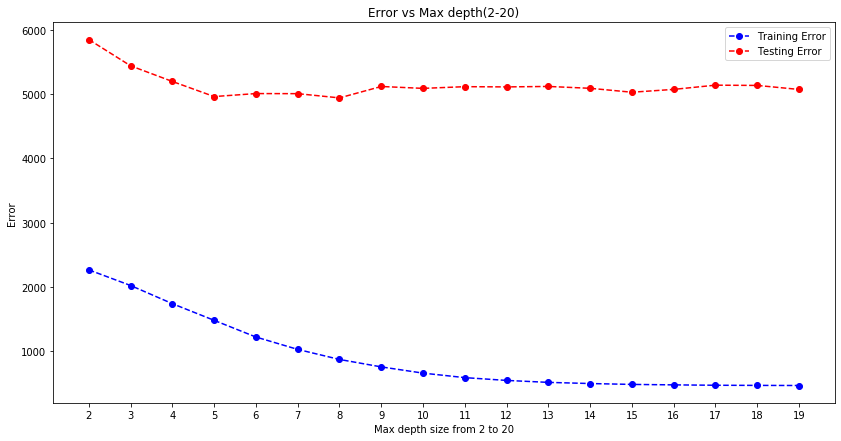

In [64]:
tr = []
ts = []

for i in range(2,20,1):

    rfr = RandomForestRegressor(random_state=10,max_depth=i)
    rfr_model = rfr.fit(X_train,Y_train)
    tr_pred_rfr = rfr_model.predict(X_train)
    ts_pred_rfr = rfr_model.predict(X_test)
    
    tr.append(round(mean_squared_error(Y_train,tr_pred_rfr),2))
    ts.append(round(mean_squared_error(Y_test,ts_pred_rfr),2))
    
plt.figure(figsize=(14,7))
plt.plot(range(2,20,1),tr,"--o",c='blue',label="Training Error")
plt.plot(range(2,20,1),ts,"--o",c='red',label="Testing Error")
plt.legend()
plt.xlabel("Max depth size from 2 to 20")
plt.ylabel("Error")
plt.title("Error vs Max depth(2-20)")
plt.xticks(range(2,20,1));

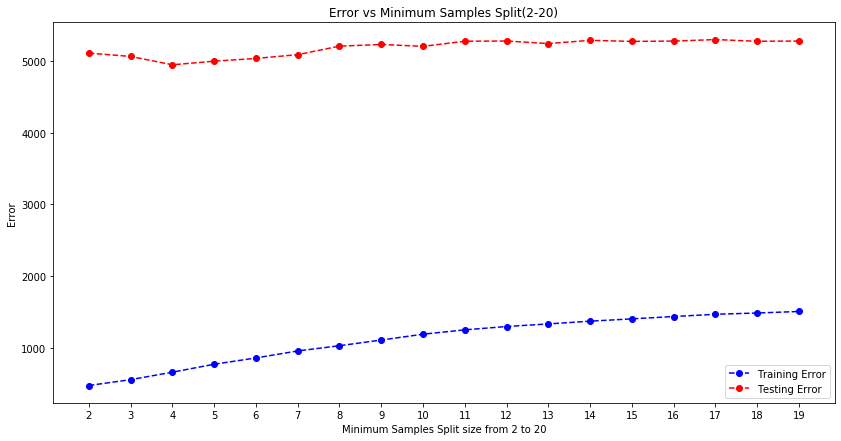

In [65]:
tr = []
ts = []

for i in range(2,20,1):

    rfr = RandomForestRegressor(random_state=10,min_samples_split=i)
    rfr_model = rfr.fit(X_train,Y_train)
    tr_pred_rfr = rfr_model.predict(X_train)
    ts_pred_rfr = rfr_model.predict(X_test)
    
    tr.append(round(mean_squared_error(Y_train,tr_pred_rfr),2))
    ts.append(round(mean_squared_error(Y_test,ts_pred_rfr),2))
    
plt.figure(figsize=(14,7))
plt.plot(range(2,20,1),tr,"--o",c='blue',label="Training Error")
plt.plot(range(2,20,1),ts,"--o",c='red',label="Testing Error")
plt.legend()
plt.xlabel("Minimum Samples Split size from 2 to 20")
plt.ylabel("Error")
plt.title("Error vs Minimum Samples Split(2-20)")
plt.xticks(range(2,20,1));

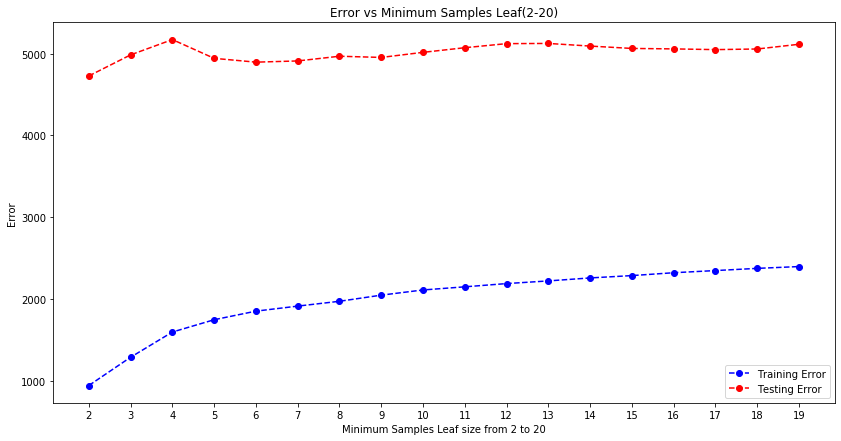

In [66]:
tr = []
ts = []

for i in range(2,20,1):

    rfr = RandomForestRegressor(random_state=10,min_samples_leaf=i)
    rfr_model = rfr.fit(X_train,Y_train)
    tr_pred_rfr = rfr_model.predict(X_train)
    ts_pred_rfr = rfr_model.predict(X_test)
    
    tr.append(round(mean_squared_error(Y_train,tr_pred_rfr),2))
    ts.append(round(mean_squared_error(Y_test,ts_pred_rfr),2))
    
plt.figure(figsize=(14,7))
plt.plot(range(2,20,1),tr,"--o",c='blue',label="Training Error")
plt.plot(range(2,20,1),ts,"--o",c='red',label="Testing Error")
plt.legend()
plt.xlabel("Minimum Samples Leaf size from 2 to 20")
plt.ylabel("Error")
plt.title("Error vs Minimum Samples Leaf(2-20)")
plt.xticks(range(2,20,1));

In [67]:
rfr = RandomForestRegressor(random_state=10,min_samples_leaf=8)
rfr_model = rfr.fit(X_train,Y_train)
tr_pred_rfr = rfr_model.predict(X_train)
ts_pred_rfr = rfr_model.predict(X_test)

print("Training error is:",round(mean_squared_error(Y_train,tr_pred_rfr),2))
print("Testing error is:",round(mean_squared_error(Y_test,ts_pred_rfr),2))

Training error is: 1973.23
Testing error is: 4968.94


##### Random forest model using GridSearchCV and tuning different parameter

In [68]:
rfr = RandomForestRegressor(random_state=10)
tg = {'min_samples_leaf':range(2,9),'n_estimators':[200,300,400]}

cv2 = GridSearchCV(rfr,tg,scoring="neg_mean_squared_error",cv=4)
cv2_model = cv2.fit(X_train,Y_train)
cv2_model.best_params_

{'min_samples_leaf': 8, 'n_estimators': 200}

In [69]:
RF = RandomForestRegressor(random_state=10, min_samples_leaf = 8, n_estimators = 200)
RF.fit(X_train, Y_train)
Y_pred = RF.predict(X_test)

print("Model Score:", RF.score(X_train, Y_train))

# Evaluating metrics:

r2=r2_score(Y_test,Y_pred)  # R-Square value
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE:", rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

Model Score: 0.5108443901117202
R-squared: 0.3758019327355355
RMSE: 70.767727876762
Adj R-square: 0.36846801288516984


<a id='8.6c'></a>
#### Extra Tree model using GridSearchCV and tuning different parameter

In [70]:
etr = ExtraTreesRegressor(random_state=10)
tg = {'min_samples_leaf':range(2,9),'n_estimators':[200,300,400]}

cv3 = GridSearchCV(etr,tg,scoring="neg_mean_squared_error",cv=4)
cv3_model = cv3.fit(X,Y)
cv3_model.best_params_

{'min_samples_leaf': 5, 'n_estimators': 400}

In [71]:
ET = ExtraTreesRegressor(random_state=10, min_samples_leaf = 5, n_estimators = 400)
ET.fit(X_train, Y_train)
Y_pred = ET.predict(X_test)

print("Model Score:", ET.score(X_train, Y_train))

# Evaluating metrics:

r2=r2_score(Y_test,Y_pred)  # R-Square value
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE:", rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

Model Score: 0.5455002633524833
R-squared: 0.3155943309532133
RMSE: 74.10215555545116
Adj R-square: 0.30755301108190636


<a id='8.7'></a>
<body>
    <h1>Metrics Summary</h1>
	<table>
		<thead>
			<tr>
                <th><u>Metrics</u></th>
				<th>Lasso Regression</th>
				<th>Pruned RandomForestRegressor</th>
				<th>Pruned ExtraTreeRegressor</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td>Model Score</td>
				<td>0.29</td>
				<td>0.51</td>
				<td>0.54</td>
			</tr>
			<tr>
				<td>R-Squared</td>
				<td>0.49</td>
				<td>0.37</td>
				<td>0.31</td>
			</tr>
			<tr>
				<td>Adj R-Squared</td>
				<td>0.46</td>
				<td>0.36</td>
				<td>0.30</td>
			</tr>
			<tr>
				<td>RMSE</td>
				<td>63.69</td>
				<td>70.76</td>
				<td>74.10</td>
			</tr>
		</tbody>
	</table>
</body>

We see that in case of:
* Lasso Regression: RMSE and Model Score is lowest and there is slight difference in R-Squared and adjusted R-Squared.
* Extra Tree: RMSE and Model Score is average and there is a difference between R-Squared and Adjusted R-Squared.
* Random Forest: RMSE and Model Score is Highest and there is minimal difference between R-Squared and Adjusted R-Squared.
* We will go forward and use our Random Forest model, as it gives a decent accuracy and is not overfitted/underfitted.

<a id='8.8'></a>
### Predicting using our pruned Extra Tree model

In [72]:
RF = RandomForestRegressor(random_state=10, min_samples_leaf = 8, n_estimators = 200)
RF.fit(X, Y)
Y_pred = RF.predict(P)

In [73]:
pb_2 = test_df_2[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'property_Area', 
        'Loan_Status', 'LoanAmount']]

pb_2['Predicted_LoanAmount'] = Y_pred
pb_2.index = range(0,pb_2.shape[0])
pb_2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,property_Area,Loan_Status,LoanAmount,Predicted_LoanAmount
0,LP001059,1,1,2,0,0,240.0,1.0,2,N,280.0,183.731123
1,LP001149,1,1,0,0,0,360.0,1.0,2,N,290.0,169.473492
2,LP001483,1,1,3,0,0,360.0,1.0,0,N,390.0,196.567646
3,LP001500,1,1,1,0,0,360.0,1.0,2,N,256.0,159.958522
4,LP001655,0,0,0,0,0,360.0,0.0,2,N,300.0,178.306319


In [74]:
# Dumping solution DataFrame to a csv file.

output_2 = pb_2[['Loan_ID', 'Loan_Amount_Term', 'LoanAmount', 'Predicted_LoanAmount']]
output_2.to_csv("Predicted_Loan_Amount.csv")

<a id='9'></a>
## 2. If customer is not eligible for the input required amount and duration:
* If duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

<a id='9.1'></a>
#### Creating new Dataframes

In [75]:
# Contains data of all customers whose loans were approved

train_df_3 = train_df_2.copy()
train_df_3.index = range(0,train_df_3.shape[0])
train_df_3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,TotalIncome,Loan_Status
0,LP001002,1,0,0,0,0,146.412162,360.0,1.0,2,5849.0,Y
1,LP001005,1,1,0,0,1,66.000000,360.0,1.0,2,3000.0,Y
2,LP001006,1,1,0,1,0,120.000000,360.0,1.0,2,4941.0,Y
3,LP001008,1,0,0,0,0,141.000000,360.0,1.0,2,6000.0,Y
4,LP001011,1,1,2,0,1,267.000000,360.0,1.0,2,9613.0,Y


In [76]:
# Contains data of all customers whose loans were rejected
# Loan_Amount_Term <=240 months (20 years).

test_df_3 = test_df_2.copy()
test_df_3 = test_df_3[test_df_3.Loan_Amount_Term <= 240]
test_df_3.index = range(0,test_df_3.shape[0])
test_df_3.shape

# Reserving for final predictions.
final_test_3 = test_df_3.copy()

In [77]:
test_df_3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,TotalIncome,Loan_Status
0,LP001059,1,1,2,0,0,280.0,240.0,1.0,2,13633.0,N
1,LP001794,1,1,2,0,1,260.0,12.0,1.0,0,10890.0,N
2,LP001207,1,1,0,1,1,165.0,180.0,0.0,0,6058.0,N
3,LP001228,1,0,0,1,0,126.0,180.0,0.0,2,5454.0,N
4,LP001451,1,1,1,0,1,160.0,180.0,0.0,2,14363.0,N


In [78]:
#Dropping of columns
train_df_3 = train_df_3.drop(["Loan_ID","Loan_Status"],axis=1)
test_df_3 = test_df_3.drop(["Loan_ID","Loan_Amount_Term","Loan_Status"],axis=1)

In [79]:
train_df_3.shape

(776, 10)

In [80]:
test_df_3.shape

(21, 9)

<a id='9.2'></a>
#### Defining X & Y

In [81]:
#X and Y has been defined using training data
#P has been defined using testing data

Y = train_df_3[["Loan_Amount_Term"]]
X = train_df_3.drop(["Loan_Amount_Term"],axis=1)
P = test_df_3

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)
print("Shape of testing dataset:", P.shape)

Shape of X: (776, 9)
Shape of Y: (776, 1)
Shape of testing dataset: (21, 9)


<a id='9.3'></a>
#### Building a Random Forest Regressor model to check feature importance

In [82]:
# Splitting the data into test and train data sets.

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2,random_state=10)

# Creating a model object.

model_DecisionTree = RandomForestRegressor(n_estimators=100, random_state=10)

# Fitting the data into our model and predicting the values.

model_DecisionTree.fit(X_train,Y_train)
Y_pred = model_DecisionTree.predict(X_test)

# Building a DataFrame to view the feature importance and sort for a better visual.

feature_imp = pd.DataFrame()
feature_imp["Feature"] = df_train.drop(["LoanAmount", "Loan_Status","Loan_ID"],axis=1).columns
feature_imp["Importance"] = model_DecisionTree.feature_importances_ 
feature_imp.sort_values("Importance", ascending = False).style.hide_index()

Feature,Importance
TotalIncome,0.397595
Loan_Amount_Term,0.358605
Dependents,0.078427
property_Area,0.055147
Married,0.030581
Gender,0.026541
Education,0.021153
Credit_History,0.019153
Self_Employed,0.012798


<a id='9.4'></a>
### Creating a model pipeline

In [83]:
# Defining multiple Regression models

models = [
    LinearRegression(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(random_state=10),
    RandomForestRegressor(n_estimators=100, random_state=10),
    ExtraTreesRegressor(n_estimators=100, random_state=10),
    GradientBoostingRegressor(n_estimators=100, random_state=10)  
]

In [84]:
### Running the model pipeline

### Creating a model pipelinefor model in models:
for model in models:
    model_score, r_squared, adjusted_r_squared, rmse = build_and_evaluate_regression_pipeline(X_train, Y_train, X_test, Y_test, model)

    print(f"Model: {type(model).__name__}")
    print(f"Model Score: {model_score}")
    print(f"R-Squared: {r_squared}")
    print(f"Adj R-Squared: {adjusted_r_squared}")
    print(f"RMSE: {rmse}")
    print("\n")    

Model: LinearRegression
Model Score: 0.046158124862513805
R-Squared: -0.11474342190150066
Adj R-Squared: -0.18346048215570265
RMSE: 67.85576489449628


Model: KNeighborsRegressor
Model Score: 0.23766368679230532
R-Squared: -0.112245977353993
Adj R-Squared: -0.18080908554704722
RMSE: 67.77971105551595


Model: DecisionTreeRegressor
Model Score: 1.0
R-Squared: -0.9748957091775923
Adj R-Squared: -1.0966358556337452
RMSE: 90.31738907447873


Model: RandomForestRegressor
Model Score: 0.8479668863411035
R-Squared: -0.1480083190554231
Adj R-Squared: -0.21877595516157933
RMSE: 68.86075956371893


Model: ExtraTreesRegressor
Model Score: 0.9999988084460165
R-Squared: -0.22227164655343645
Adj R-Squared: -0.29761715901220986
RMSE: 71.05312115340905


Model: GradientBoostingRegressor
Model Score: 0.5336662505401681
R-Squared: -0.11878709175944024
Adj R-Squared: -0.1877534193336523
RMSE: 67.97872499716075




* All models perform poorly.
* We will try to handle the imbalance in our data.

In [85]:
train_df_3.Loan_Amount_Term.value_counts()

360.0    673
180.0     51
300.0     15
480.0     14
240.0      6
84.0       6
120.0      4
60.0       3
12.0       1
350.0      1
36.0       1
6.0        1
Name: Loan_Amount_Term, dtype: int64

<a id='9.5'></a>
#### Upscaling our data in order to imporve model performance.

In [86]:
balanced_data = balance_multiclass_dataset_with_limit(train_df_3, 'Loan_Amount_Term', desired_samples_per_class=100)

In [87]:
balanced_data.index = range(0,balanced_data.shape[0])
balanced_data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,TotalIncome
0,1,1,0,0,1,25.0,120.0,1.0,1,3459.0
1,0,1,0,0,0,84.0,480.0,1.0,1,2666.0
2,1,1,0,1,0,118.0,36.0,1.0,1,5205.0
3,1,1,0,0,0,133.0,350.0,1.0,0,6624.0
4,1,1,2,0,0,128.0,360.0,1.0,0,4120.0
...,...,...,...,...,...,...,...,...,...,...
1768,1,1,0,0,0,111.0,12.0,1.0,2,7482.0
1769,0,1,1,0,0,132.0,84.0,1.0,0,4333.0
1770,1,0,0,0,0,96.0,360.0,1.0,2,4083.0
1771,1,0,0,0,0,40.0,180.0,1.0,0,2925.0


In [88]:
Y = balanced_data[["Loan_Amount_Term"]]
X = balanced_data.drop(["Loan_Amount_Term"],axis=1)
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2,random_state=10)
balanced_data.Loan_Amount_Term.value_counts()

360.0    673
120.0    100
480.0    100
36.0     100
350.0    100
60.0     100
240.0    100
6.0      100
180.0    100
12.0     100
84.0     100
300.0    100
Name: Loan_Amount_Term, dtype: int64

<a id='9.6'></a>
#### Re-Running the model pipeline

In [89]:
### Creating a model pipelinefor model in models:
for model in models:
    model_score, r_squared, adjusted_r_squared, rmse = build_and_evaluate_regression_pipeline(X_train, Y_train, X_test, Y_test, model)

    print(f"Model: {type(model).__name__}")
    print(f"Model Score: {model_score}")
    print(f"R-Squared: {r_squared}")
    print(f"Adj R-Squared: {adjusted_r_squared}")
    print(f"RMSE: {rmse}")
    print("\n")    

Model: LinearRegression
Model Score: 0.18668309689323925
R-Squared: 0.1569446219051216
Adj R-Squared: 0.13495187291134225
RMSE: 134.59434240406924


Model: KNeighborsRegressor
Model Score: 0.9244272119638731
R-Squared: 0.8594078283099529
Adj R-Squared: 0.8557402064397777
RMSE: 54.96412556014649


Model: DecisionTreeRegressor
Model Score: 1.0
R-Squared: 0.9249501840933626
Adj R-Squared: 0.9229923628088417
RMSE: 40.158138108458516


Model: RandomForestRegressor
Model Score: 0.9926439201500336
R-Squared: 0.9595316078536225
Adj R-Squared: 0.9584759106671952
RMSE: 29.488774756163036


Model: ExtraTreesRegressor
Model Score: 1.0
R-Squared: 0.9572722736923175
Adj R-Squared: 0.9561576373538562
RMSE: 30.300768604577822


Model: GradientBoostingRegressor
Model Score: 0.8895278095728122
R-Squared: 0.8538562241939038
Adj R-Squared: 0.8500437778685275
RMSE: 56.03881139870458




* Linear Regression: performs very poorly and can not be used.
* Decision Tree: Has a perfect Model Score and suggests it has been overfitted to training data.
* K-Neighbors & Gradient Boosting: Perform well but have a higher RMSE.
* Random Forest & Extra Trees: Perform well and have the lowest RMSE scores. Model Score however, is very close to 1 and these models might be overfitted.
* We will try to prune our Random Forest & Extra Trees Models and compare.

<a id='9.7'></a>
### Pruning well performing models.

<a id='9.7a'></a>
#### Random forest model with different parameters along with graphs

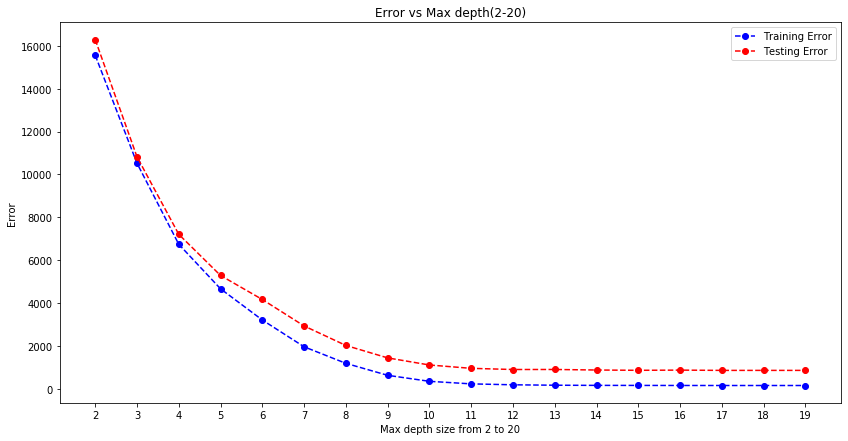

In [90]:
tr = []
ts = []

for i in range(2,20,1):

    rfr = RandomForestRegressor(random_state=10,max_depth=i)
    rfr_model = rfr.fit(X_train,Y_train)
    tr_pred_rfr = rfr_model.predict(X_train)
    ts_pred_rfr = rfr_model.predict(X_test)
    
    tr.append(round(mean_squared_error(Y_train,tr_pred_rfr),2))
    ts.append(round(mean_squared_error(Y_test,ts_pred_rfr),2))
    
plt.figure(figsize=(14,7))
plt.plot(range(2,20,1),tr,"--o",c='blue',label="Training Error")
plt.plot(range(2,20,1),ts,"--o",c='red',label="Testing Error")
plt.legend()
plt.xlabel("Max depth size from 2 to 20")
plt.ylabel("Error")
plt.title("Error vs Max depth(2-20)")
plt.xticks(range(2,20,1));

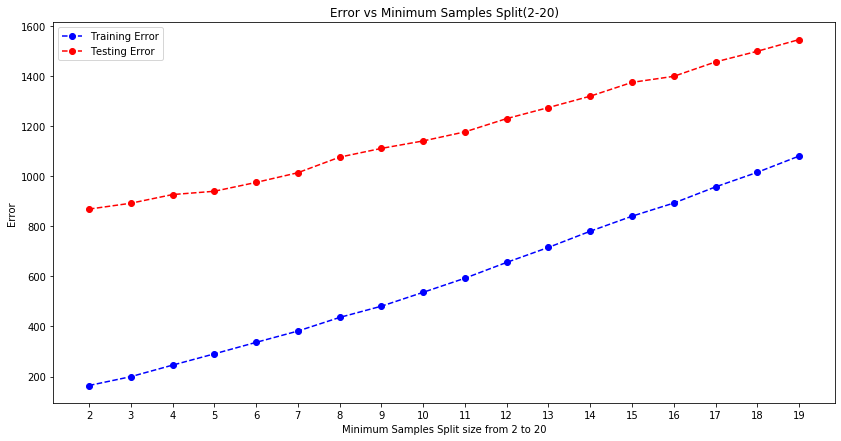

In [91]:
tr = []
ts = []

for i in range(2,20,1):

    rfr = RandomForestRegressor(random_state=10,min_samples_split=i)
    rfr_model = rfr.fit(X_train,Y_train)
    tr_pred_rfr = rfr_model.predict(X_train)
    ts_pred_rfr = rfr_model.predict(X_test)
    
    tr.append(round(mean_squared_error(Y_train,tr_pred_rfr),2))
    ts.append(round(mean_squared_error(Y_test,ts_pred_rfr),2))
    
plt.figure(figsize=(14,7))
plt.plot(range(2,20,1),tr,"--o",c='blue',label="Training Error")
plt.plot(range(2,20,1),ts,"--o",c='red',label="Testing Error")
plt.legend()
plt.xlabel("Minimum Samples Split size from 2 to 20")
plt.ylabel("Error")
plt.title("Error vs Minimum Samples Split(2-20)")
plt.xticks(range(2,20,1));

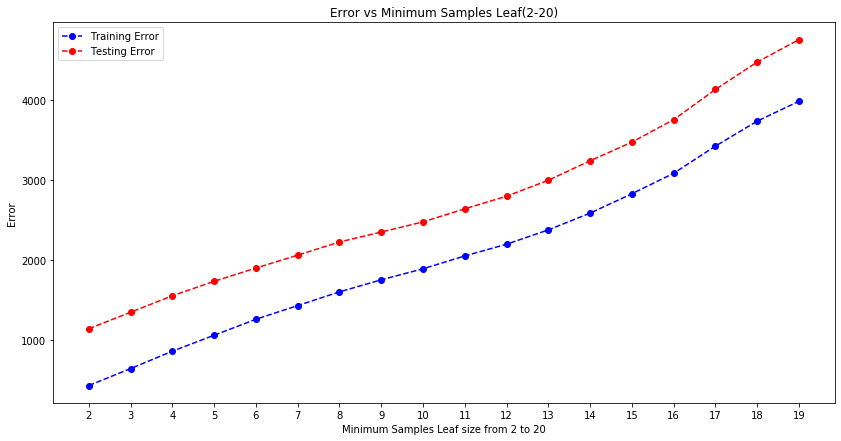

In [92]:
tr = []
ts = []

for i in range(2,20,1):

    rfr = RandomForestRegressor(random_state=10,min_samples_leaf=i)
    rfr_model = rfr.fit(X_train,Y_train)
    tr_pred_rfr = rfr_model.predict(X_train)
    ts_pred_rfr = rfr_model.predict(X_test)
    
    tr.append(round(mean_squared_error(Y_train,tr_pred_rfr),2))
    ts.append(round(mean_squared_error(Y_test,ts_pred_rfr),2))
    
plt.figure(figsize=(14,7))
plt.plot(range(2,20,1),tr,"--o",c='blue',label="Training Error")
plt.plot(range(2,20,1),ts,"--o",c='red',label="Testing Error")
plt.legend()
plt.xlabel("Minimum Samples Leaf size from 2 to 20")
plt.ylabel("Error")
plt.title("Error vs Minimum Samples Leaf(2-20)")
plt.xticks(range(2,20,1));

In [93]:
rfr = RandomForestRegressor(random_state=10,min_samples_leaf=2)
rfr_model = rfr.fit(X_train,Y_train)
tr_pred_rfr = rfr_model.predict(X_train)
ts_pred_rfr = rfr_model.predict(X_test)

print("Training error is:",round(mean_squared_error(Y_train,tr_pred_rfr),2))
print("Testing error is:",round(mean_squared_error(Y_test,ts_pred_rfr),2))

Training error is: 428.55
Testing error is: 1138.98


##### Random forest model using GridSearchCV and tuning different parameter

In [94]:
rfr = RandomForestRegressor(random_state=10)
tg = {'min_samples_leaf':range(2,5),
      'n_estimators':[200,300,400,500],
     'max_depth':range(8,12),
     'min_samples_split':range(2,5)}

cv2 = GridSearchCV(rfr,tg,scoring="neg_mean_squared_error",cv=4)
cv2_model = cv2.fit(X_train,Y_train)
cv2_model.best_params_

{'max_depth': 11,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [95]:
RF = RandomForestRegressor(random_state=10, max_depth=11, min_samples_leaf = 2, n_estimators = 200)
RF.fit(X_train, Y_train)
Y_pred = RF.predict(X_test)

print("Model Score:", RF.score(X_train, Y_train))

# Evaluating metrics:

r2=r2_score(Y_test,Y_pred)  # R-Square value
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE:", rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

Model Score: 0.9786645436629557
R-squared: 0.9458951634910465
RMSE: 34.09704932688286
Adj R-square: 0.9456189618299118


<a id='9.7b'></a>
#### Extra Tree model using GridSearchCV and tuning different parameter

In [96]:
etr = ExtraTreesRegressor(random_state=10)
tg = {'min_samples_leaf':range(2,9),'n_estimators':[200,300,400,500]}

cv3 = GridSearchCV(etr,tg,scoring="neg_mean_squared_error",cv=4)
cv3_model = cv3.fit(X,Y)
cv3_model.best_params_

{'min_samples_leaf': 2, 'n_estimators': 500}

In [97]:
ET = ExtraTreesRegressor(random_state=10, min_samples_leaf = 2, n_estimators = 500)
ET.fit(X_train, Y_train)
Y_pred = ET.predict(X_test)

print("Model Score:", ET.score(X_train, Y_train))

# Evaluating metrics:

r2=r2_score(Y_test,Y_pred)  # R-Square value
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE:", rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

Model Score: 0.9757165519719767
R-squared: 0.9330422921147769
RMSE: 37.93141487020541
Adj R-square: 0.9327004773836555


<a id='9.8'></a>
<body>
    <h1>Metrics Summary</h1>
	<table>
		<thead>
			<tr>
                <th><u>Metrics</u></th>
				<th>Pruned RandomForestRegressor</th>
				<th>Pruned ExtraTreeRegressor</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td>Model Score</td>
				<td>0.978</td>
				<td>0.975</td>
			</tr>
			<tr>
				<td>R-Squared</td>
				<td>0.94</td>
				<td>0.93</td>
			</tr>
			<tr>
				<td>Adj R-Squared</td>
				<td>0.94</td>
				<td>0.93</td>
			</tr>
			<tr>
				<td>RMSE</td>
				<td>34.09</td>
				<td>37.93</td>
			</tr>
		</tbody>
	</table>
</body>

Our Pruned Random Forest model performs well and we will make predictions using it.
<a id='9.9'></a>
### Final Predictions

In [98]:
RF = RandomForestRegressor(random_state=10, max_depth=11, min_samples_leaf = 2, n_estimators = 500)
RF.fit(X, Y)
Y_pred = RF.predict(P)

In [99]:
pb_3 = final_test_3[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Credit_History', 'property_Area', 
        'Loan_Status', 'Loan_Amount_Term']]

pb_3['Predicted_Loan_Amount_Term'] = Y_pred
pb_3.index = range(0,pb_3.shape[0])
pb_3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,property_Area,Loan_Status,Loan_Amount_Term,Predicted_Loan_Amount_Term
0,LP001059,1,1,2,0,0,280.0,1.0,2,N,240.0,348.441970
1,LP001794,1,1,2,0,1,260.0,1.0,0,N,12.0,345.560559
2,LP001207,1,1,0,1,1,165.0,0.0,0,N,180.0,346.841406
3,LP001228,1,0,0,1,0,126.0,0.0,2,N,180.0,323.056273
4,LP001451,1,1,1,0,1,160.0,0.0,2,N,180.0,276.133936


In [100]:
# Dumping solution DataFrame to a csv file.

output_3 = pb_3[['Loan_ID', 'LoanAmount', 'Loan_Amount_Term', 'Predicted_Loan_Amount_Term']]
output_3.to_csv("Predicted_Loan_Amount_Term.csv")

<a id='9.10'></a>
# Trying with classification.
* We are implementing classification on our third problem statement.
* We already have good scores with our regression models.
* Since we have a multiclass Dependent Feature, we want to see how our classification models perform.
* The goal of this extra step is to showcase that for our data, we can use regression as well as classification models.

<a id='9.1'></a>
#### Creating new Dataframes

In [101]:
# Contains data of all customers whose loans were approved

train_df_3 = train_df_2.copy()
train_df_3.index = range(0,train_df_3.shape[0])
train_df_3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,TotalIncome,Loan_Status
0,LP001002,1,0,0,0,0,146.412162,360.0,1.0,2,5849.0,Y
1,LP001005,1,1,0,0,1,66.000000,360.0,1.0,2,3000.0,Y
2,LP001006,1,1,0,1,0,120.000000,360.0,1.0,2,4941.0,Y
3,LP001008,1,0,0,0,0,141.000000,360.0,1.0,2,6000.0,Y
4,LP001011,1,1,2,0,1,267.000000,360.0,1.0,2,9613.0,Y


In [102]:
# Contains data of all customers whose loans were rejected
# Loan_Amount_Term <=240 months (20 years).

test_df_3 = test_df_2.copy()
test_df_3 = test_df_3[test_df_3.Loan_Amount_Term <= 240]
test_df_3.index = range(0,test_df_3.shape[0])
test_df_3.shape

# Reserving for final predictions.
final_test_3 = test_df_3.copy()

In [103]:
test_df_3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,TotalIncome,Loan_Status
0,LP001059,1,1,2,0,0,280.0,240.0,1.0,2,13633.0,N
1,LP001794,1,1,2,0,1,260.0,12.0,1.0,0,10890.0,N
2,LP001207,1,1,0,1,1,165.0,180.0,0.0,0,6058.0,N
3,LP001228,1,0,0,1,0,126.0,180.0,0.0,2,5454.0,N
4,LP001451,1,1,1,0,1,160.0,180.0,0.0,2,14363.0,N


In [104]:
#Dropping of columns
train_df_3 = train_df_3.drop(["Loan_ID","Loan_Status"],axis=1)
test_df_3 = test_df_3.drop(["Loan_ID","Loan_Amount_Term","Loan_Status"],axis=1)

In [105]:
train_df_3.shape

(776, 10)

In [106]:
test_df_3.shape

(21, 9)

<a id='9.2'></a>
#### Defining X & Y

In [107]:
#X and Y has been defined using training data
#P has been defined using testing data

Y = train_df_3[["Loan_Amount_Term"]]
X = train_df_3.drop(["Loan_Amount_Term"],axis=1)
P = test_df_3

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)
print("Shape of testing dataset:", P.shape)

Shape of X: (776, 9)
Shape of Y: (776, 1)
Shape of testing dataset: (21, 9)


<a id='9.3'></a>
#### Building a Random Forest Regressor model to check feature importance

In [108]:
# Splitting the data into test and train data sets.

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2,random_state=10)

# Creating a model object.

model_DecisionTree = RandomForestRegressor(n_estimators=100, random_state=10)

# Fitting the data into our model and predicting the values.

model_DecisionTree.fit(X_train,Y_train)
Y_pred = model_DecisionTree.predict(X_test)

# Building a DataFrame to view the feature importance and sort for a better visual.

feature_imp = pd.DataFrame()
feature_imp["Feature"] = df_train.drop(["LoanAmount", "Loan_Status","Loan_ID"],axis=1).columns
feature_imp["Importance"] = model_DecisionTree.feature_importances_ 
feature_imp.sort_values("Importance", ascending = False).style.hide_index()

Feature,Importance
TotalIncome,0.397595
Loan_Amount_Term,0.358605
Dependents,0.078427
property_Area,0.055147
Married,0.030581
Gender,0.026541
Education,0.021153
Credit_History,0.019153
Self_Employed,0.012798


<a id='9.4'></a>
### Creating a model pipeline

In [109]:
# Defining multiple classification models

models = [
    LogisticRegression(),
    DecisionTreeClassifier(criterion="gini", random_state=10),
    RandomForestClassifier(n_estimators=100, random_state=10),
    GradientBoostingClassifier(random_state=10),
    SVC(probability=True, random_state=10),
    KNeighborsClassifier()
]

In [110]:
### Running the model pipeline

### Looping through each model in our pipeline:
for model in models:
    accuracy, report, cm = build_and_evaluate_classification_pipeline(X_train, Y_train, X_test, Y_test, model)

    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(cm)
    print("\n")### Running the model pipeline

Model: LogisticRegression
Accuracy: 0.8461538461538461
Classification Report:
              precision    recall  f1-score   support

        36.0       0.00      0.00      0.00         1
        84.0       0.00      0.00      0.00         1
       180.0       0.00      0.00      0.00        14
       240.0       0.00      0.00      0.00         1
       300.0       0.00      0.00      0.00         4
       360.0       0.85      1.00      0.92       132
       480.0       0.00      0.00      0.00         3

    accuracy                           0.85       156
   macro avg       0.12      0.14      0.13       156
weighted avg       0.72      0.85      0.78       156

Confusion Matrix:
[[  0   0   0   0   0   1   0]
 [  0   0   0   0   0   1   0]
 [  0   0   0   0   0  14   0]
 [  0   0   0   0   0   1   0]
 [  0   0   0   0   0   4   0]
 [  0   0   0   0   0 132   0]
 [  0   0   0   0   0   3   0]]


Model: DecisionTreeClassifier
Accuracy: 0.75
Classification Report:
              preci

* All models perform poorly.
* We will try to handle the imbalance in our data.

In [111]:
train_df_3.Loan_Amount_Term.value_counts()

360.0    673
180.0     51
300.0     15
480.0     14
240.0      6
84.0       6
120.0      4
60.0       3
12.0       1
350.0      1
36.0       1
6.0        1
Name: Loan_Amount_Term, dtype: int64

<a id='9.5'></a>
#### Upscaling our data in order to imporve model performance.

In [112]:
balanced_data = balance_multiclass_dataset_with_limit(train_df_3, 'Loan_Amount_Term', desired_samples_per_class=100)

In [113]:
balanced_data.index = range(0,balanced_data.shape[0])
balanced_data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,TotalIncome
0,1,1,0,0,1,25.0,120.0,1.0,1,3459.0
1,0,1,0,0,0,84.0,480.0,1.0,1,2666.0
2,1,1,0,1,0,118.0,36.0,1.0,1,5205.0
3,1,1,0,0,0,133.0,350.0,1.0,0,6624.0
4,1,1,2,0,0,128.0,360.0,1.0,0,4120.0
...,...,...,...,...,...,...,...,...,...,...
1768,1,1,0,0,0,111.0,12.0,1.0,2,7482.0
1769,0,1,1,0,0,132.0,84.0,1.0,0,4333.0
1770,1,0,0,0,0,96.0,360.0,1.0,2,4083.0
1771,1,0,0,0,0,40.0,180.0,1.0,0,2925.0


In [114]:
Y = balanced_data[["Loan_Amount_Term"]]
X = balanced_data.drop(["Loan_Amount_Term"],axis=1)
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2,random_state=10)
balanced_data.Loan_Amount_Term.value_counts()

360.0    673
120.0    100
480.0    100
36.0     100
350.0    100
60.0     100
240.0    100
6.0      100
180.0    100
12.0     100
84.0     100
300.0    100
Name: Loan_Amount_Term, dtype: int64

<a id='9.6'></a>
#### Re-Running the model pipeline

In [115]:
### Running the model pipeline

### Looping through each model in our pipeline:
for model in models:
    accuracy, report, cm = build_and_evaluate_classification_pipeline(X_train, Y_train, X_test, Y_test, model)

    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(cm)
    print("\n")### Running the model pipeline

Model: LogisticRegression
Accuracy: 0.5746478873239437
Classification Report:
              precision    recall  f1-score   support

         6.0       1.00      1.00      1.00         9
        12.0       0.78      1.00      0.88        21
        36.0       0.68      1.00      0.81        26
        60.0       0.50      0.29      0.36        21
        84.0       0.00      0.00      0.00        13
       120.0       0.64      0.78      0.71        23
       180.0       0.00      0.00      0.00        18
       240.0       0.00      0.00      0.00        24
       300.0       0.00      0.00      0.00        17
       350.0       0.69      1.00      0.82        18
       360.0       0.55      0.71      0.62       143
       480.0       0.50      0.18      0.27        22

    accuracy                           0.57       355
   macro avg       0.45      0.50      0.46       355
weighted avg       0.48      0.57      0.51       355

Confusion Matrix:
[[  9   0   0   0   0   0   0   0   0

## Metrics Summary:
1. Logistic Regression:
    * Accuracy: 0.575
    * Precision, Recall, and F1-score: Varies by class
    * Confusion Matrix: Varies by class  
<br>    

2. Decision Tree Classifier:
    * Accuracy: 0.935
    * Precision, Recall, and F1-score: Excellent across most classes
    * Confusion Matrix: Well-balanced  
<br>    

3. Random Forest Classifier:
    * Accuracy: 0.975
    * Precision, Recall, and F1-score: Excellent across most classes
    * Confusion Matrix: Well-balanced  
<br>    

4. Gradient Boosting Classifier:
    * Accuracy: 0.972
    * Precision, Recall, and F1-score: Excellent across most classes
    * Confusion Matrix: Well-balanced  
<br>    

5. Support Vector Classifier (SVC):
    * Accuracy: 0.738
    * Precision, Recall, and F1-score: Varies by class
    * Confusion Matrix: Varies by class  
<br>    

6. K-Nearest Neighbors (KNN):
    * Accuracy: 0.848
    * Precision, Recall, and F1-score: Good overall, especially for some classes
    * Confusion Matrix: Well-balanced

* We see that our classification models also perform very well, for our problem statement.
* We confirm that in future, if either classification or regression performs poorly, we can use its counterpart.
* Considering above metrics summary, we decide to use Random Forest classifier or Gradient Boost Classifier.
* If we choose Random Forest and need to prune it, I have commented the code below.

In [116]:
# ##### Random forest model using GridSearchCV and tuning different parameter

# rfr = RandomForestRegressor(random_state=10)
# tg = {'min_samples_leaf':range(2,9),'n_estimators':[200,300,400],'max_depth':range(2,10),'min_samples_split':range(2,5)}

# cv2 = GridSearchCV(rfr,tg,scoring="neg_mean_squared_error",cv=4)
# cv2_model = cv2.fit(X_train,Y_train)
# cv2_model.best_params_

# RF = RandomForestRegressor(random_state=10, min_samples_leaf = 8, n_estimators = 200)
# RF.fit(X_train, Y_train)
# Y_pred = RF.predict(X_test)

# print("Model Score:", RF.score(X_train, Y_train))

# # Evaluating metrics:

# r2=r2_score(Y_test,Y_pred)  # R-Square value
# print("R-squared:",r2)

# rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
# print("RMSE:", rmse)

# adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
# print("Adj R-square:",adjusted_r_squared)

In [117]:
# Time taken to run the entire notebook

end_time = time.time()

result = calculate_execution_time(start_time, end_time)
print(result)

Execution time: 17 minutes and 5.35 seconds


# End of Project